# Compression and Entropy
## Introduction
In this notebook, we will explore how compression and entropy are related. We will use the `zlib` library to compress data using the LZ77 algorithm and calculate the entropy of the data. We will then compare the entropy of the data with the compression ratio achieved by the LZ77 algorithm to see if there is a correlation between the two.


In [ ]:
import math
import zlib
import lzma
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")


In [112]:
sample_dir = Path("samples/entropy")
files = [f for f in sample_dir.iterdir() if f.is_file()]


def read_file_content(file_path: Path) -> bytes:
    return file_path.read_bytes()

In [113]:
# LZ77 compression
def compress_lz77(data: bytes) -> bytes:
    return zlib.compress(data)

In [114]:
# LZMA compression
def compress_lzma(data: bytes) -> bytes:
    return lzma.compress(data)

### Shannon Entropy Formula

The Shannon entropy formula is:

$$
H(X) = - \sum_{i=1}^{n} p(x_i) \cdot \log_2(p(x_i))
$$

Where $p(x_i)$ is the probability of the $i$-th byte occurring in the data.


In [115]:
def calculate_entropy(data: bytes) -> float:
    # Count the frequency of each byte
    byte_counts = Counter(data)
    total_bytes = len(data)

    entropy = 0
    for count in byte_counts.values():
        probability = count / total_bytes
        entropy -= probability * math.log2(probability)

    return entropy

In [116]:
results = []

for file_path in files:
    data = read_file_content(file_path)
    original_size = len(data)
    file_name = file_path.name
    entropy = calculate_entropy(data)

    algorithms = [
        ("LZ77", compress_lz77),
        ("LZMA", compress_lzma)
    ]

    for algorithm_name, compress_func in algorithms:
        compressed_data = compress_func(data)
        compressed_size = len(compressed_data)
        compression_ratio = original_size / compressed_size

        results.append({
            "file": file_name,
            "algorithm": algorithm_name,
            "original size (bytes)": original_size,
            "compressed size (bytes)": compressed_size,
            "compression ratio": compression_ratio,
            "entropy (bits/symbol)": entropy
        })

In [117]:
df = pd.DataFrame(results)
df

,file,algorithm,original size (bytes),compressed size (bytes),compression ratio,entropy (bits/symbol)
0,file_000_entropy.txt,LZ77,100000,15994,6.252345,0.999997
1,file_000_entropy.txt,LZMA,100000,14212,7.036307,0.999997
2,file_001_entropy.txt,LZ77,100000,15953,6.268413,0.999968
3,file_001_entropy.txt,LZMA,100000,14224,7.030371,0.999968
4,file_002_entropy.txt,LZ77,100000,15998,6.250781,0.999997
...,...,...,...,...,...,...
195,file_097_entropy.txt,LZMA,100000,99764,1.002366,7.856477
196,file_098_entropy.txt,LZ77,100000,99460,1.005429,7.923153
197,file_098_entropy.txt,LZMA,100000,100064,0.999360,7.923153
198,file_099_entropy.txt,LZ77,100000,100041,0.999590,7.997889


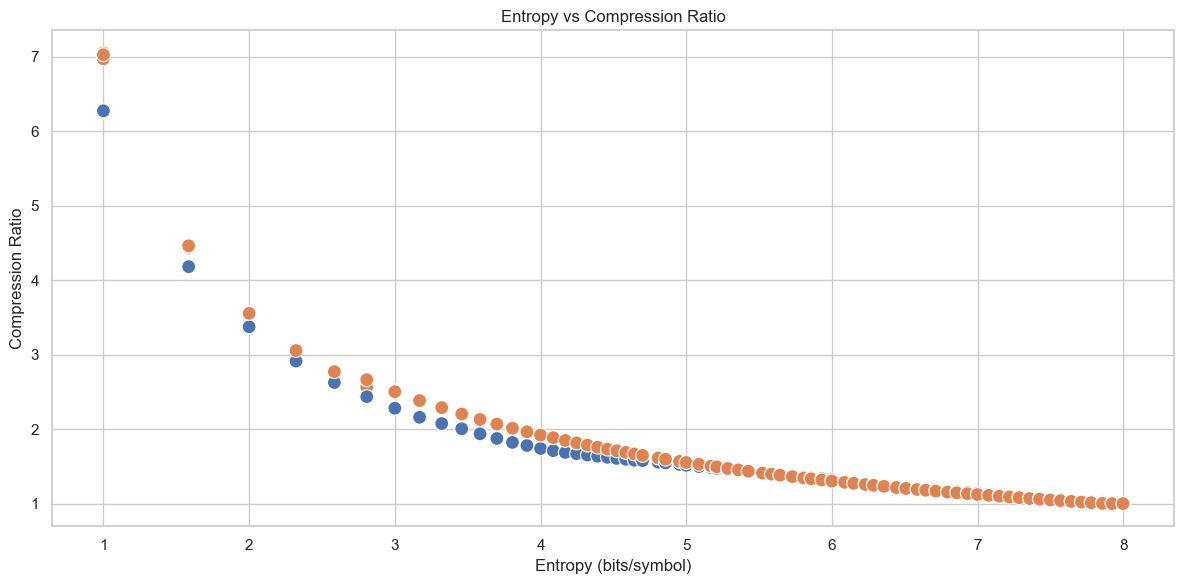

In [120]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="entropy (bits/symbol)", hue="algorithm", y="compression ratio", s=100, legend=False)
plt.title("Entropy vs. Compression Ratio")
plt.xlabel("Entropy (bits/symbol)")
plt.ylabel("Compression Ratio")
plt.tight_layout()
plt.show()

## Conclusion

The scatter plot reveals a clear inverse relationship between entropy and compression ratio. This correlation aligns with information theory principles: higher entropy data, being more random, resists compression, while lower entropy data compresses more efficiently due to its predictability.

The plot's curve suggests a non-linear relationship, specifically an exponential decay. This can be modeled by the equation:

$$ y = a \cdot b^x $$

Where $y$ represents compression ratio, $x$ denotes entropy, and $a$ and $b$ are constants with $0 < b < 1$. This exponential decay model accurately captures the observed rapid decrease in compression ratio as entropy increases, reflecting the fundamental nature of data compressibility in relation to its information content.